## カーネル法を用いてサポートベクターマシン実装


In [ ]:

#!pip install mglearn
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=eb6c63681349e77b0dee4476ee21dba78895cdc028410e363147a631f558c968
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
moons = make_moons(n_samples=200, noise=0.1, random_state=0)
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

In [ ]:
X = moons[0]
y = moons[1]

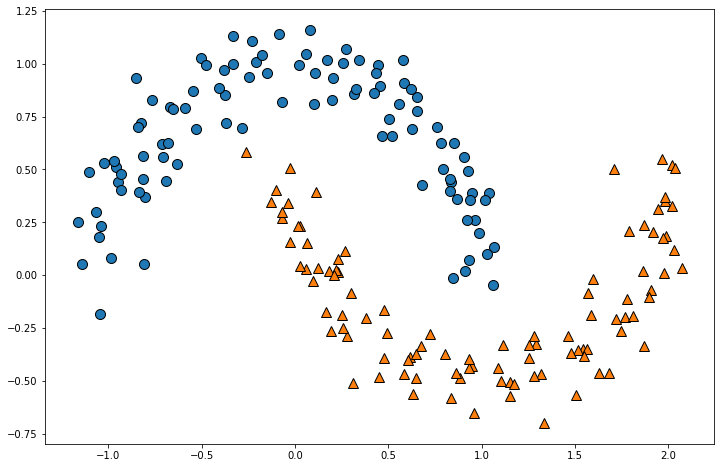

In [ ]:
plt.figure(figsize=(12,8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)




Text(0, 0.5, '$x_1$')

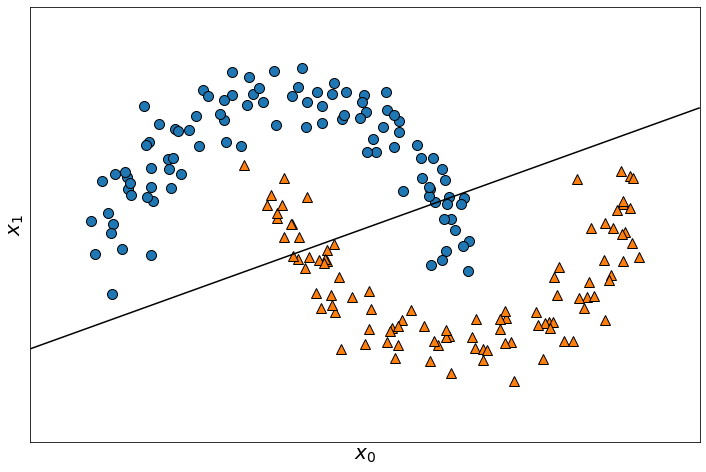

In [ ]:
lin_svm  = LinearSVC().fit(X_train_scaled, y_train)

plt.figure(figsize=(12, 8))
mglearn.plots.plot_2d_separator(lin_svm,X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print(X_train_poly.shape)
print(X_train_poly)

(150, 10)
[[ 1.00000000e+00  8.86813848e-01 -4.84896235e-01 ... -3.81341214e-01
   2.08511538e-01 -1.14010917e-01]
 [ 1.00000000e+00  9.24799914e-01  4.94247065e-01 ...  4.22707215e-01
   2.25910272e-01  1.20734753e-01]
 [ 1.00000000e+00 -7.63797985e-01  8.26528213e-01 ...  4.82186114e-01
  -5.21787743e-01  5.64641828e-01]
 ...
 [ 1.00000000e+00 -9.68196502e-01  5.38851311e-01 ...  5.05121626e-01
  -2.81126249e-01  1.56461263e-01]
 [ 1.00000000e+00 -6.70964946e-01  7.93803059e-01 ...  3.57365342e-01
  -4.22790644e-01  5.00193800e-01]
 [ 1.00000000e+00 -2.68526403e-02  5.04722011e-01 ...  3.63937020e-04
  -6.84055729e-03  1.28575060e-01]]


In [ ]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [ ]:
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.fit_transform(X_test_poly)

lin_svm = LinearSVC().fit(X_train_poly_scaled, y_train)
lin_svm.predict(X_test_poly_scaled) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
from sklearn.pipeline import Pipeline
poly_svm = Pipeline([
         ('poly', PolynomialFeatures(degree=3)),
         ('scaler', StandardScaler()),
         ('svm', LinearSVC())                     
])

poly_svm.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('svm', LinearSVC())])

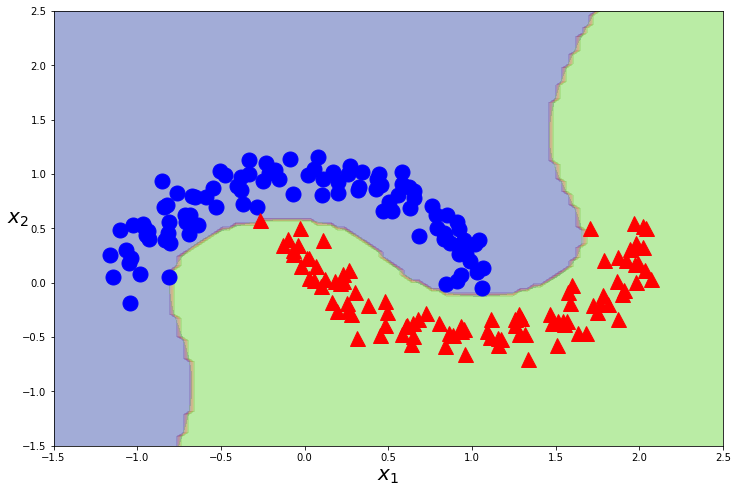

In [ ]:
from numpy.lib.function_base import meshgrid
def plot_decision_function(model):
  _x0 = np.linspace(-1.5, 2.5, 100)
  _x1 = np.linspace(-1.5, 2.5, 100)
  x0,x1 = meshgrid(_x0, _x1)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = model.predict(X).reshape(x0.shape)
  y_decision = model.decision_function(X).reshape(x0.shape)
  # alpha=濃さ cmap=色 重ね合わせてる感じ
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg , alpha=0.2)
  plt.contourf(x0, x1, y_decision, levels= [y_decision.min(), 0, y_decision.max()], alpha=0.3)
 
def plot_dataset(X, y):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", ms=15)
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", ms=15)
  plt.xlabel("$x_1$", fontsize=20)
  plt.ylabel("$x_2$", fontsize=20, rotation=0)

X = moons[0]
y = moons[1]
plt.figure(figsize=(12, 8))
plot_decision_function(poly_svm)
plot_dataset(X, y)
plt.show()



In [ ]:
# 関数内可視化
_x0 = np.linspace(-1.5, 2.5, 100)
_x1 = np.linspace(-1.5, 2.5, 100)
x0,x1 = meshgrid(_x0, _x1)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_svm.predict(X).reshape(x0.shape)
y_decision = poly_svm.decision_function(X).reshape(x0.shape)
#print(y_pred[0:10])
#print(y_decision[0:5])
#X.shape
X = moons[0]
y = moons[1]
#trueとfalseで返し、trueの行を抽出
X[:, 0][y==0]
[y==0] 



[array([ True, False, False,  True, False, False,  True, False,  True,
        False,  True, False, False, False,  True,  True,  True, False,
         True,  True, False, False,  True, False,  True, False, False,
        False, False,  True,  True,  True, False, False,  True, False,
        False,  True,  True, False, False,  True,  True, False, False,
         True,  True,  True, False, False,  True, False, False,  True,
        False,  True,  True, False,  True,  True, False,  True, False,
         True, False,  True,  True, False,  True,  True, False,  True,
        False, False, False,  True, False,  True,  True, False, False,
         True, False, False, False,  True,  True,  True, False, False,
         True,  True, False,  True, False, False, False, False,  True,
        False, False, False,  True,  True,  True, False,  True,  True,
        False,  True,  True,  True,  True,  True,  True, False,  True,
        False, False,  True,  True,  True, False,  True, False,  True,
      

In [ ]:
# カーネル法を用いる(上記をより効率的に)

In [ ]:
from sklearn.svm import SVC

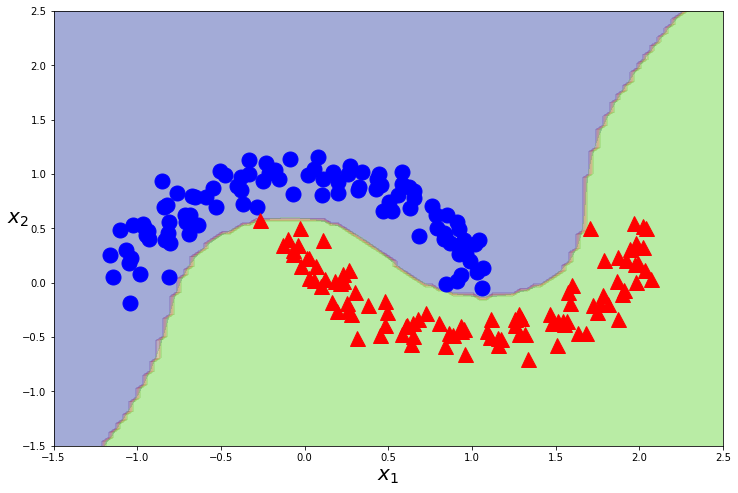

In [ ]:
kernel_svm = Pipeline([
      ('scaler', StandardScaler()),
      # Coef0 は、小数で指定．カーネルに poly または sigmoid を選択したとき有効．普通，学習によって最適値を決める．
      ('svm', SVC(kernel='poly', degree=3, coef0=1))
])

kernel_svm.fit(X,y)

plt.figure(figsize=(12, 8))
plot_decision_function(kernel_svm)
plot_dataset(X, y)
plt.show()

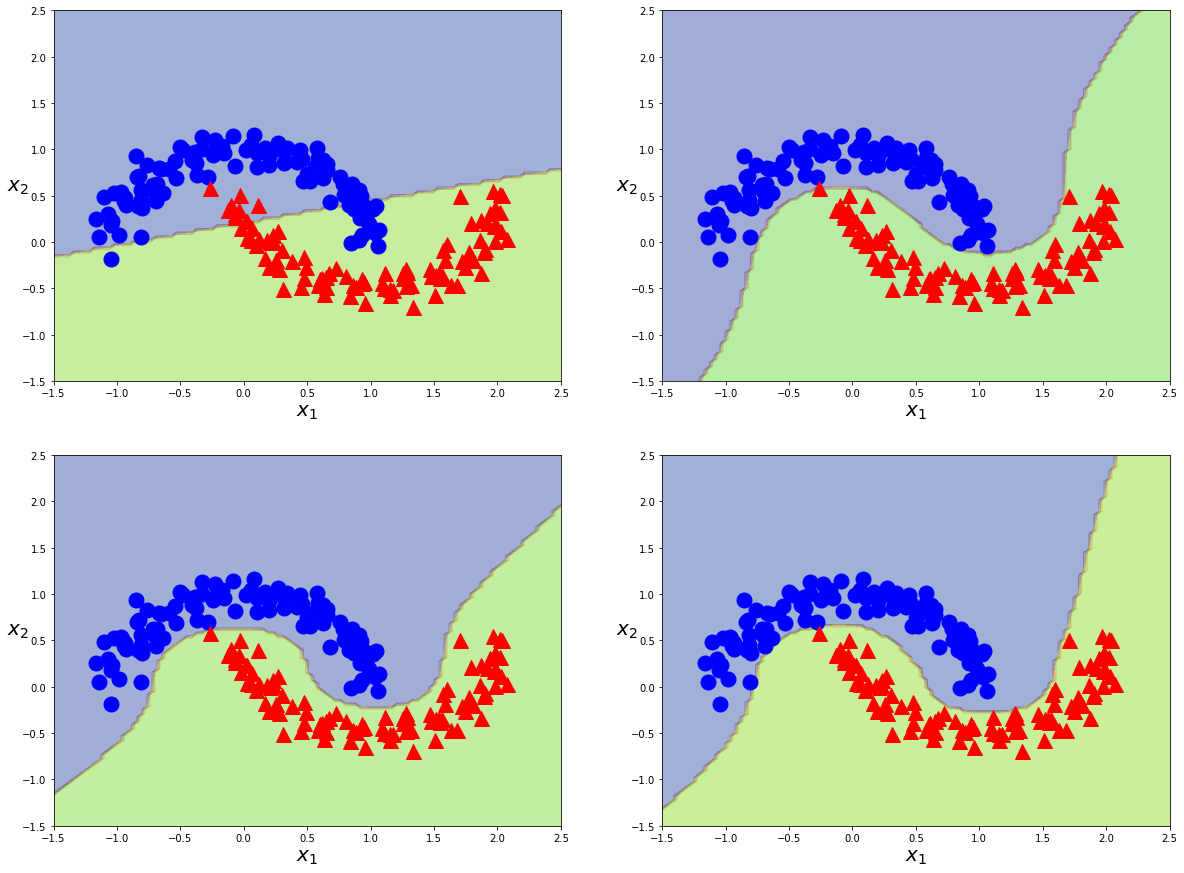

In [ ]:
# 次元数による表現比較

plt.figure(figsize=(20, 15))

for i, degree in enumerate([2, 3, 5, 10]):
  poly_kernel_svm = Pipeline([
      ('scaler', StandardScaler()),
      ('svm', SVC(kernel='poly', degree=degree, coef0=1))
  ])
  poly_kernel_svm.fit(X, y)

  plt.subplot(221 + i)
  plot_decision_function(poly_kernel_svm)
  plot_dataset(X, y)
  plt.show